# 0.0 IMPORTS

In [42]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

## 0.1 Helper functions

## 0.2 Loading data

In [43]:
df_sales_raw = pd.read_csv('../data/train.csv')
df_store_raw = pd.read_csv('../data/store.csv')


#merge
df_row = pd.merge(df_sales_raw, df_store_raw, on='Store', how='left')



df_row.head(10)



C:\Users\d\AppData\Local\Temp\ipykernel_15864\1119377118.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales_raw = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


# 1.0 DESCRICAO DOS DADOS

In [44]:
df1 = df_row.copy()

In [45]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [46]:
# rename columns    
df1 = df_row.copy()
# old column names
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']


# rename columns
anakecase = lambda x: inflection.underscore(x)
cols_new = list(map(anakecase, cols_old))

df1.columns = cols_new




In [6]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimension

In [47]:
print('number of rows:', df1.shape[0])
print('number of columns:', df1.shape[1])

number of rows: 1017209
number of columns: 18


## 1.3 Data types

In [48]:
#alterar objeto para data 
if 'date' in df1.columns:
    df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check Na

In [49]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 fillout


In [50]:
# Tratamento eficiente de competition_distance
if 'competition_distance' in df1.columns:
    df1['competition_distance'] = df1['competition_distance'].fillna(200000).clip(upper=200000)
if 'competition_open_since_month' in df1.columns and 'date' in df1.columns:
    df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if not math.isnan(x['competition_open_since_month']) else 0, axis=1)
if 'competition_open_since_year' in df1.columns and 'date' in df1.columns:
    df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if not math.isnan(x['competition_open_since_month']) else 0, axis=1)
if 'promo2_since_week' in df1.columns and 'date' in df1.columns:
    df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if not math.isnan(x['promo2_since_week']) else 0, axis=1)
if 'promo2_since_year' in df1.columns and 'date' in df1.columns:
    df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if not math.isnan(x['promo2_since_year']) else 0, axis=1)
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
if 'promo_interval' in df1.columns:
    df1['promo_interval'].fillna(0, inplace=True)
if 'date' in df1.columns:
    df1['month_map'] = df1['date'].dt.month.map(month_map)
if 'promo_interval' in df1.columns:
    df1['promo_interval'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['promo_interval'] == 1 else 2 if x['promo_interval'] == 2 else 3 if x['promo_interval'] == 3 else 4 if x['promo_interval'] == 4 else 5 if x['promo_interval'] == 5 else 6 if x['promo_interval'] == 6 else 7 if x['promo_interval'] == 7 else 8 if x['promo_interval'] == 8 else 9 if x['promo_interval'] == 9 else 10 if x['promo_interval'] == 10 else 11 if x['promo_interval'] == 11 else 12 if x['promo_interval'] == 12 else '0', axis=1)
df1.isna().sum()

C:\Users\d\AppData\Local\Temp\ipykernel_15864\360667503.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['promo_interval'].fillna(0, inplace=True)


store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
dtype: int64

## 1.6 Change types 

## 1.7 Discriptive Statistics

In [51]:
# Selecionar apenas atributos numéricos para estatísticas descritivas
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

# Central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skewness, kurtosis

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenace

m = pd.concat([ct1, ct2, d1, d2, d3, d4, d5, d6])

# Transpor antes de renomear colunas
m = m.T
m.columns = ['mean', 'median', 'std', 'min', 'max', 'range', 'skewness', 'kurtosis']

m

,mean,median,std,min,max,range,skewness,kurtosis
store,558.429727,558.0,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524
day_of_week,3.998341,4.0,1.997390,1.0,7.0,6.0,0.001593,-1.246873
sales,5773.818972,5744.0,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375
customers,633.145946,609.0,464.411506,0.0,7388.0,7388.0,1.598650,7.091773
open,0.830107,1.0,0.375539,0.0,1.0,1.0,-1.758045,1.090723
promo,0.381515,0.0,0.485758,0.0,1.0,1.0,0.487838,-1.762018
school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.0,1.677842,0.815154
competition_distance,5935.442677,2330.0,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712
competition_open_since_month,3.986791,3.0,3.866688,0.0,12.0,12.0,0.573971,-0.935799
competition_open_since_year,2013.832292,2014.0,0.777396,2013.0,2015.0,2.0,0.300265,-1.290603


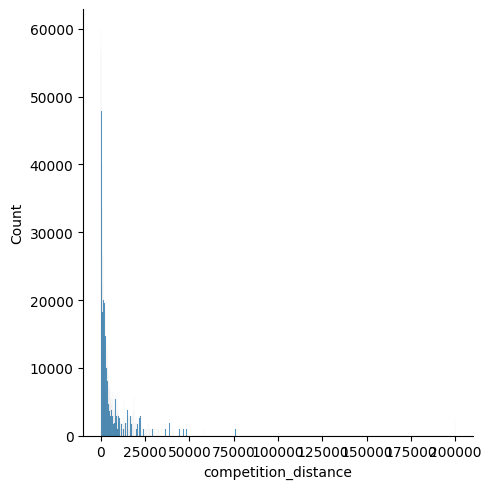

In [52]:
sns.displot(df1['competition_distance']) 

In [53]:
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      5
store_type         4
assortment         3
promo_interval     2
month_map         12
dtype: int64

<Axes: xlabel='state_holiday', ylabel='sales'>

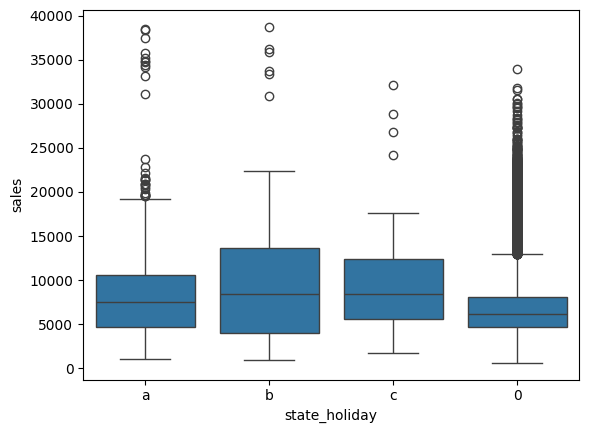

In [54]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]
sns.boxplot(x='state_holiday', y='sales', data=aux1)

# 2.0 Criancao das hipoteses

In [55]:
df2 = df1.copy()

### 2.1 hipoteses da loja


**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.



### 2.2 hipoteses do produto


**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.


### 2.3 hipoteses do tempo


**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.1 feature engineering

In [56]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since (robusto)
def get_competition_since(row):
    year = int(row['competition_open_since_year']) if not pd.isna(row['competition_open_since_year']) and row['competition_open_since_year'] > 0 else row['date'].year
    month = int(row['competition_open_since_month']) if not pd.isna(row['competition_open_since_month']) and row['competition_open_since_month'] > 0 else row['date'].month
    day = 1
    return pd.Timestamp(year=year, month=month, day=day)
df2['competition_since'] = df2.apply(get_competition_since, axis=1)
df2['competition_time_months'] = ((df2['date'] - df2['competition_since']) / np.timedelta64(30, 'D')).astype(int)
# promo since (robusto)
def get_promo_since(row):
    try:
        year = int(row['promo2_since_year'])
        week = int(row['promo2_since_week'])
        if year > 0 and week > 0:
            return pd.to_datetime(f'{year}-W{week}-1', format='%Y-W%W-%w') - pd.Timedelta(days=7)
        else:
            return row['date']
    except:
        return row['date']
df2['promo_since'] = df2.apply(get_promo_since, axis=1)
df2['promo_time_weeks'] = ((df2['date'] - df2['promo_since'])/np.timedelta64(1, 'W')).astype(int)
# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [57]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 PASSO 3 - FILTRAGEM DE VARIAVEIS 

In [58]:

df3 = df2.copy()



In [59]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,month_map,year,month,day,week_of_year,year_week,competition_since,competition_time_months,promo_since,promo_time_weeks
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,Jul,2015,7,31,31,2015-30,2015-07-01,1,2015-07-31,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,Jul,2015,7,31,31,2015-30,2015-07-01,1,2015-07-27,0
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,Jul,2015,7,31,31,2015-30,2015-07-01,1,2015-07-27,0
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,Jul,2015,7,31,31,2015-30,2015-07-01,1,2015-07-31,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,Jul,2015,7,31,31,2015-30,2015-07-01,1,2015-07-31,0


## 3.1 filtragem das linhas 

In [60]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Selecao das colunas



In [61]:
cols_drop = ['customers','open','promo_interval','month_map']

df3 = df3.drop(cols_drop, axis=1)

df3.columns


Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'year', 'month', 'day',
       'week_of_year', 'year_week', 'competition_since',
       'competition_time_months', 'promo_since', 'promo_time_weeks'],
      dtype='object')

# 4.0 PASSO 4 - ANALISE EXPLORATORIA DOSA DADOS 

In [62]:
df4 = df3.copy()

## 4.1 Analine univariada

### 4.1.1 Response variable

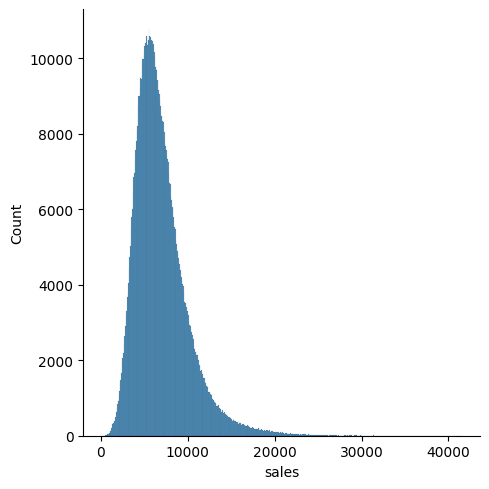

In [64]:
sns.displot(df4['sales']);

### 4.1.2 Numerical veriable

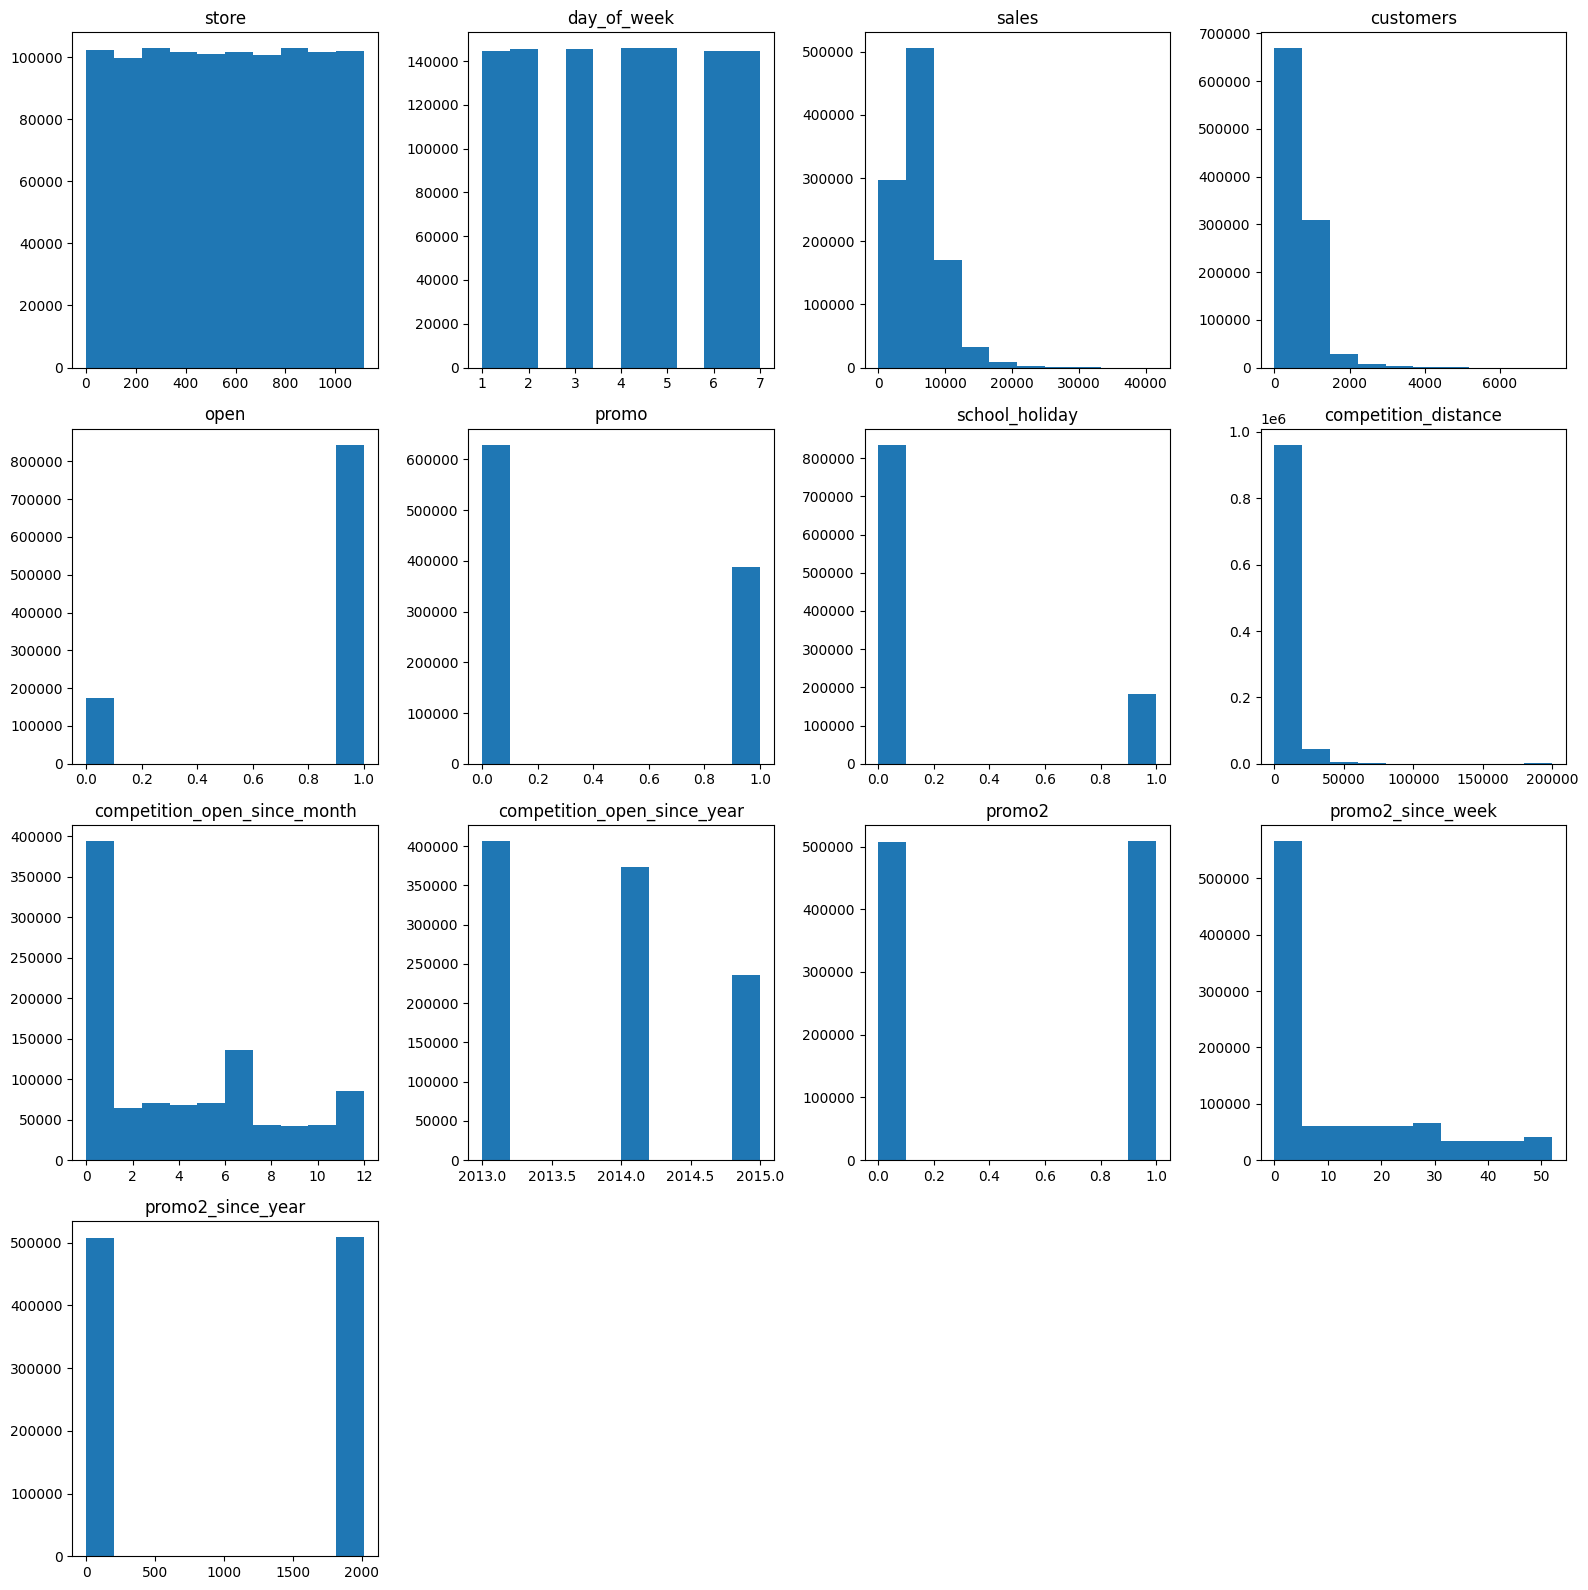

In [65]:
# 1. numero de colunas (4)
ncols = 4

# 2. Calcular o número de linhas necessárias
nrows = -(-len(num_attributes.columns) // ncols)  # divisão arredondada para cima

# 3. Crie a grade de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))

# 4. Transformar axes em uma lista para facilitar o acesso
axes = axes.flatten()

# 5. Para cada atributo numerico plotar o histograma em um subplot
for i, col in enumerate(num_attributes.columns):
    axes[i].hist(num_attributes[col])
    axes[i].set_title(col)

# 6. Desativar os subplots extras (caso o número de atributos não seja múltiplo de 4)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# 7. Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

### 4.1.3 categorical variable

In [66]:
df3['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

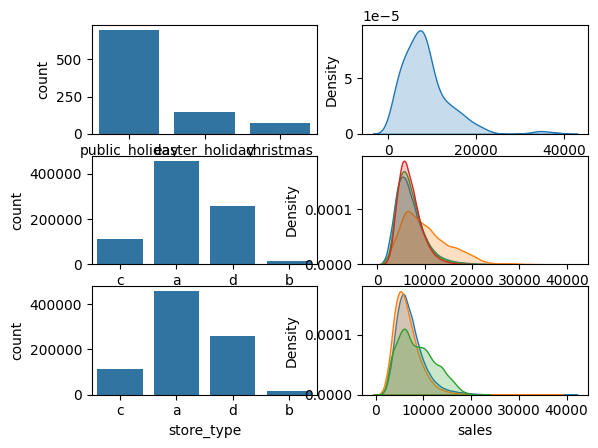

In [67]:
# state_holiday

x = df4[df4['state_holiday'] != 'regular_day']
plt.subplot(3, 2, 1)
sns.countplot(x=x['state_holiday'])

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'east_holiday']['sales'], label='east Holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'cristmas']['sales'], label='christmas', fill=True)


# store_type
plt.subplot(3, 2, 3)
sns.countplot(x=df4['store_type'])

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', fill=True)


# assortment
plt.subplot(3, 2, 5)
sns.countplot(x=df4['store_type'])

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True)


plt.show()





## 4.2 Analine bivariada

### **H1** Lojas com maior sortimentos deveriam vender mais.
**FALSE** Lojas com MAIOR SOTIMENTO vendem  MENOS 



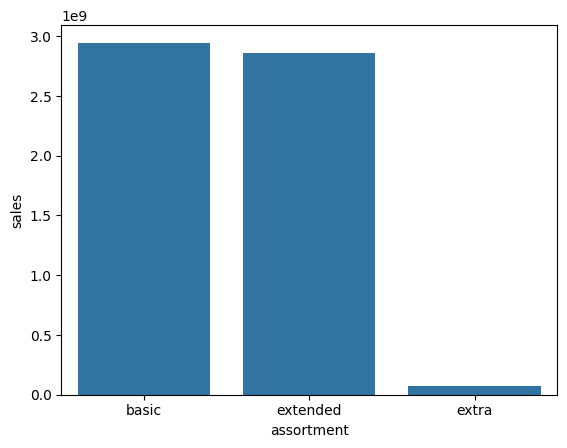

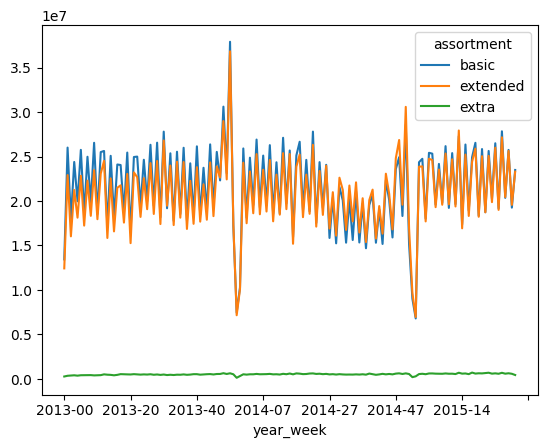

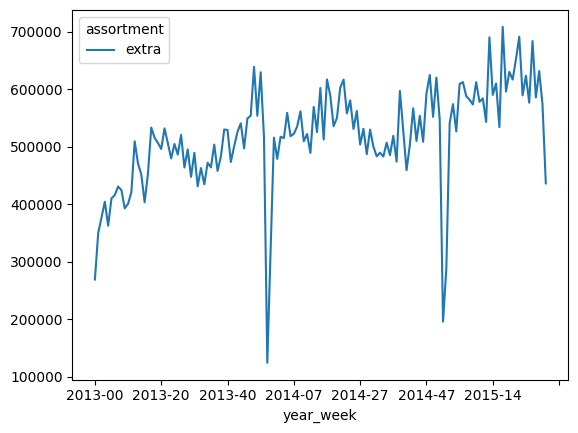

In [68]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1);

aux2 = df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot();

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot();


### **H2** Lojas com competidores mais próximos deveriam vender menos.



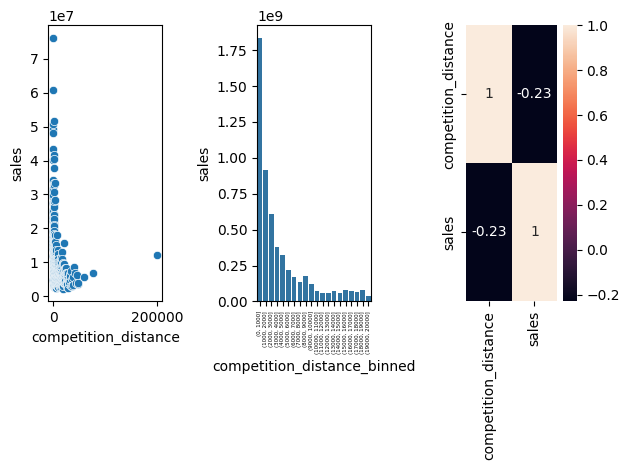

In [116]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
plt.subplot(1, 3, 1 )
sns.scatterplot(x='competition_distance', y='sales', data=aux1)
plt.subplot(1, 3, 2 )
bins = list(range(0, 20001, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned', observed=False).sum().reset_index()
aux2['competition_distance_binned_num'] = aux2['competition_distance_binned'].apply(lambda x: x.mid)
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)
plt.xticks(rotation=90, fontsize=4)
# Remover colunas não numéricas antes de calcular a correlação
plt.subplot(1, 3, 3 )
corr_data = aux1.drop(columns=['competition_distance_binned'], errors='ignore')
sns.heatmap(corr_data.corr(method='pearson'), annot=True)
plt.tight_layout()
plt.show()

### **H3** Lojas com competidores à mais tempo deveriam vendem mais.

C:\Users\d\AppData\Local\Temp\ipykernel_15864\674772765.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


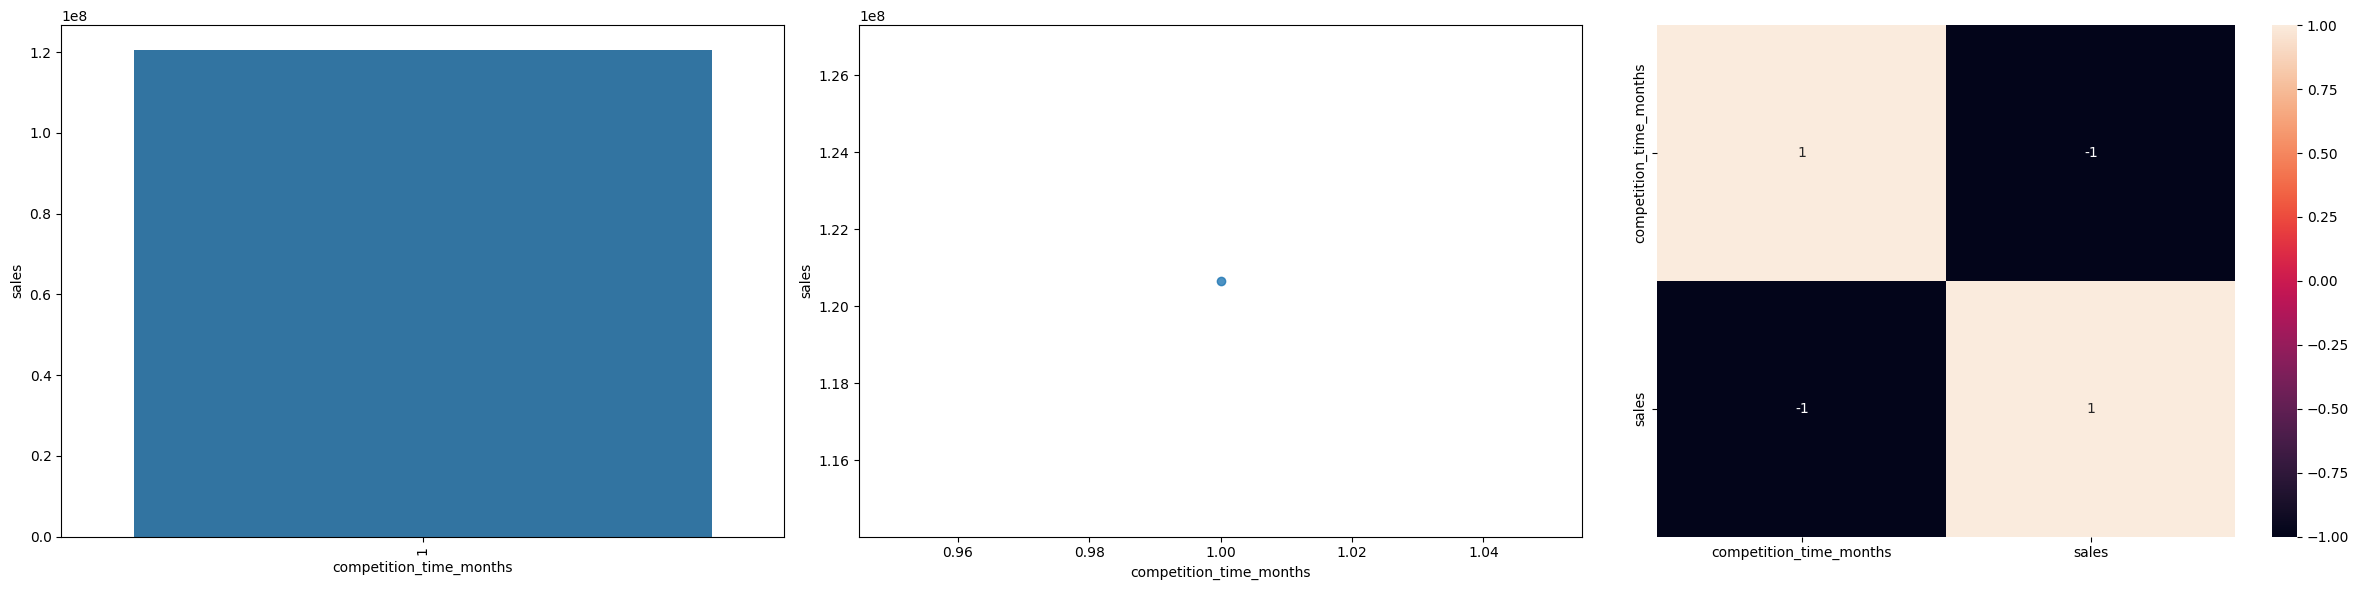

In [93]:
# Visualização H3: lojas com competidores há mais tempo deveriam vender mais
aux1 = df4[['competition_time_months', 'sales']].groupby('competition_time_months').sum().reset_index()
aux2 = aux1[(aux1['competition_time_months'] < 120) & (aux1['competition_time_months'] != 0)]
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.barplot(x='competition_time_months', y='sales', data=aux2, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.regplot(x='competition_time_months', y='sales', data=aux2, ax=axes[1])
corr = aux1.corr(method='pearson')
sns.heatmap(corr, annot=True, ax=axes[2])
plt.tight_layout()
plt.show()

## 4.3 Analine multvariada